In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('netflix_customer_churn.csv') 
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [5]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [6]:
categorical_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
{col: df[col].unique() for col in categorical_cols}

{'gender': array(['Other', 'Female', 'Male'], dtype=object),
 'subscription_type': array(['Basic', 'Standard', 'Premium'], dtype=object),
 'region': array(['Africa', 'Europe', 'Asia', 'Oceania', 'South America',
        'North America'], dtype=object),
 'device': array(['TV', 'Mobile', 'Laptop', 'Desktop', 'Tablet'], dtype=object),
 'payment_method': array(['Gift Card', 'Crypto', 'Debit Card', 'PayPal', 'Credit Card'],
       dtype=object),
 'favorite_genre': array(['Action', 'Sci-Fi', 'Drama', 'Horror', 'Romance', 'Comedy',
        'Documentary'], dtype=object)}

## Task 2: Univariate Analysis

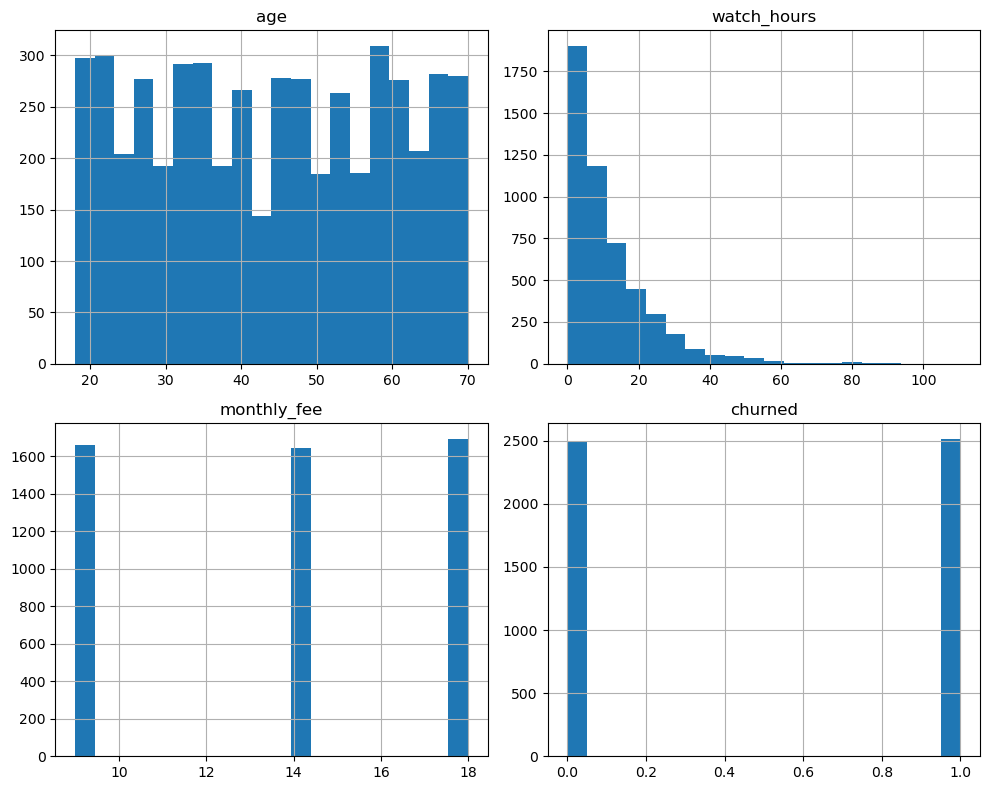

In [7]:
num_cols = ['age', 'watch_hours', 'monthly_fee', 'churned']
df[num_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

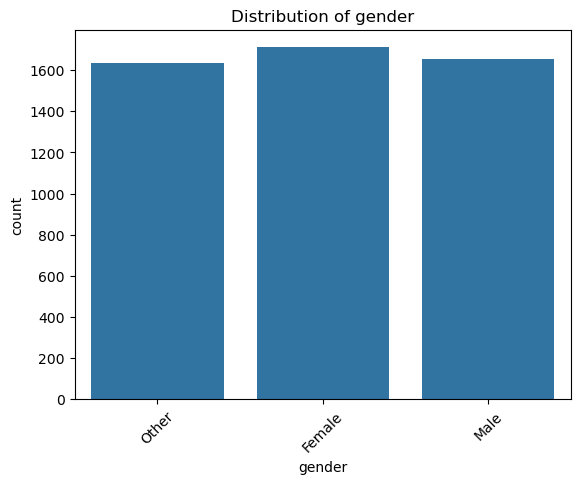

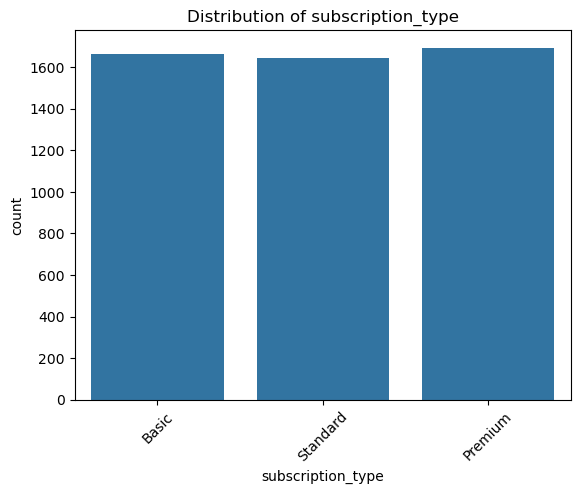

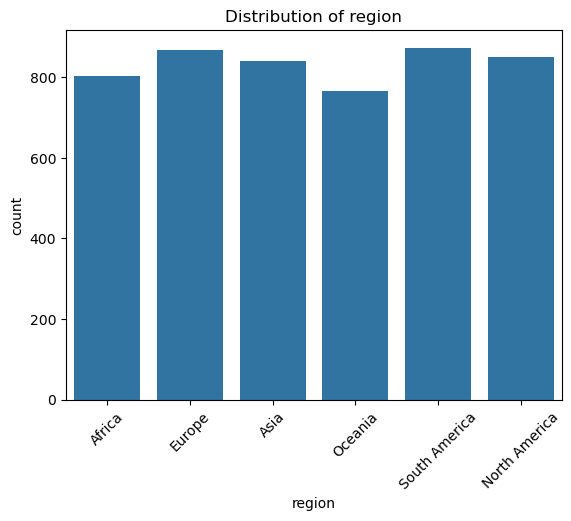

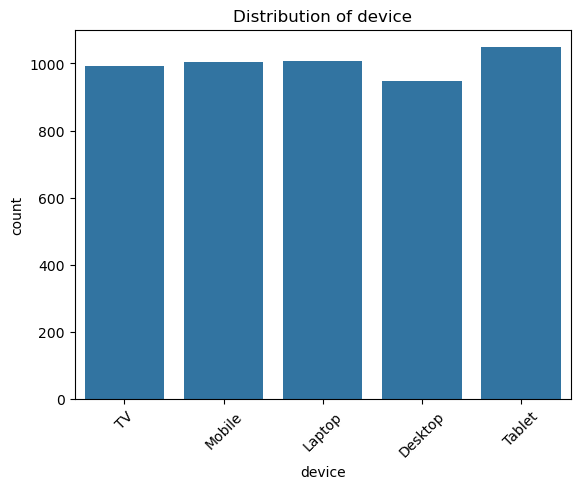

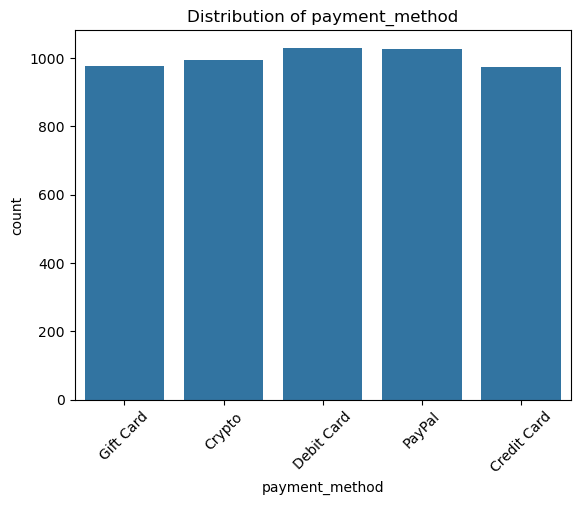

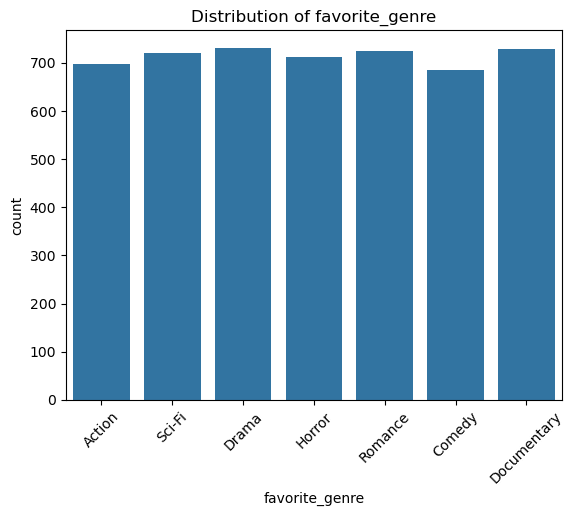

In [8]:
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

## Task 3: Bivariate Analysis

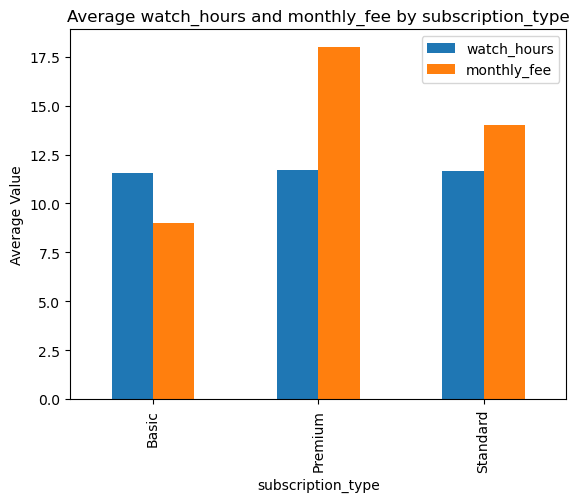

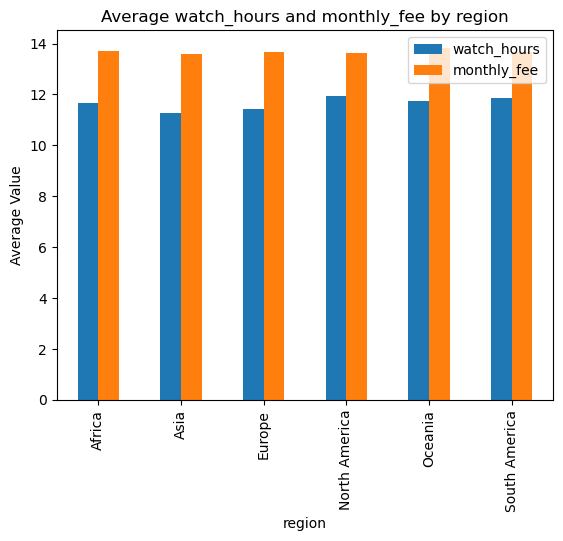

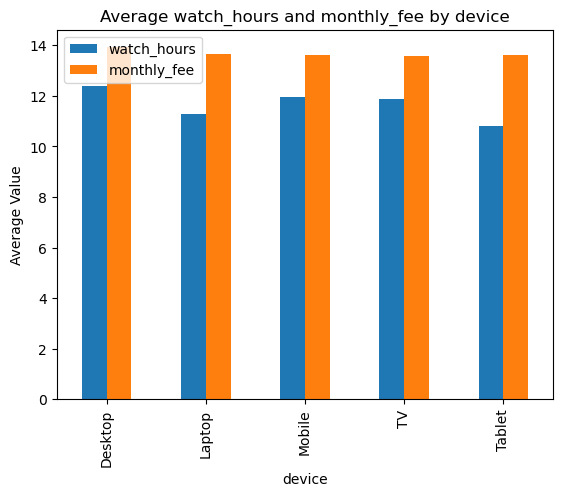

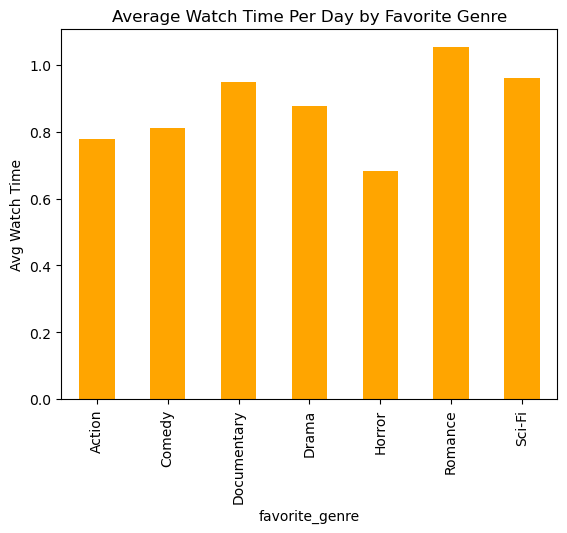

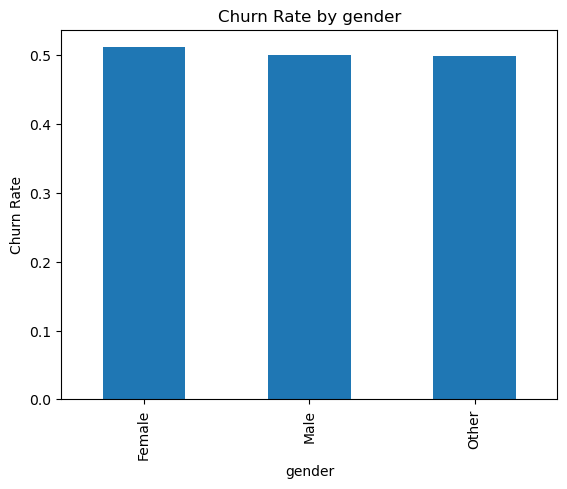

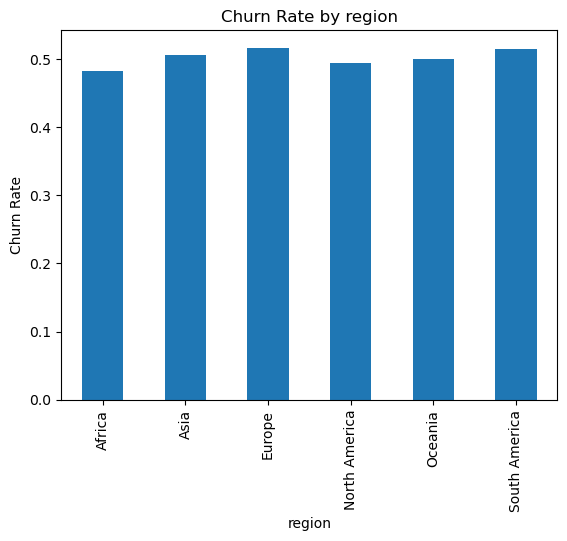

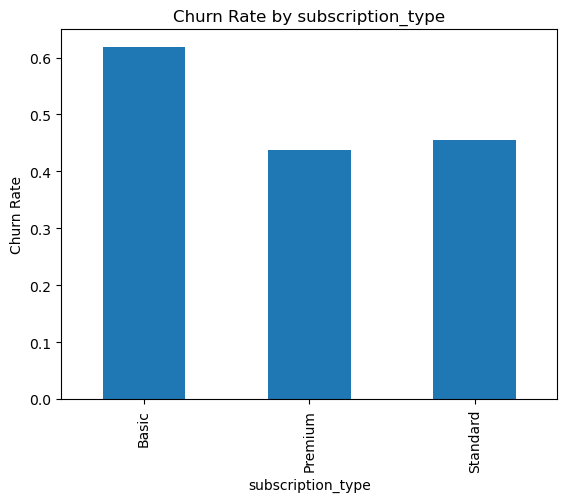

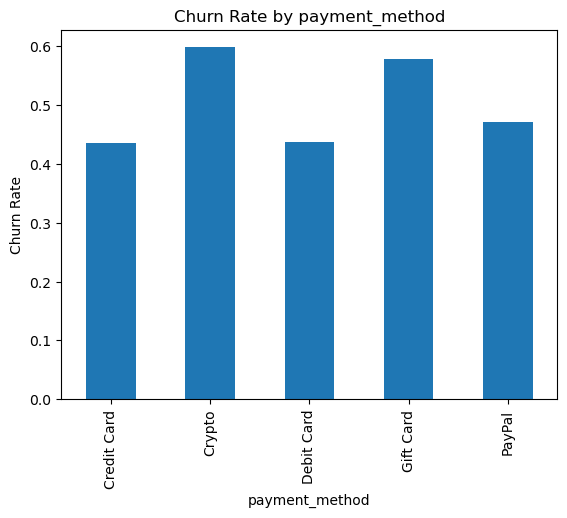

In [9]:
for col in ['subscription_type', 'region', 'device']:
    df.groupby(col)[['watch_hours', 'monthly_fee']].mean().plot(kind='bar')
    plt.title(f'Average watch_hours and monthly_fee by {col}')
    plt.ylabel('Average Value')
    plt.show()

df.groupby('favorite_genre')['avg_watch_time_per_day'].mean().plot(kind='bar', color='orange')
plt.title('Average Watch Time Per Day by Favorite Genre')
plt.ylabel('Avg Watch Time')
plt.show()

for col in ['gender', 'region', 'subscription_type', 'payment_method']:
    churn_rate = df.groupby(col)['churned'].mean()
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.show()

## Task 4: Correlation Analysis

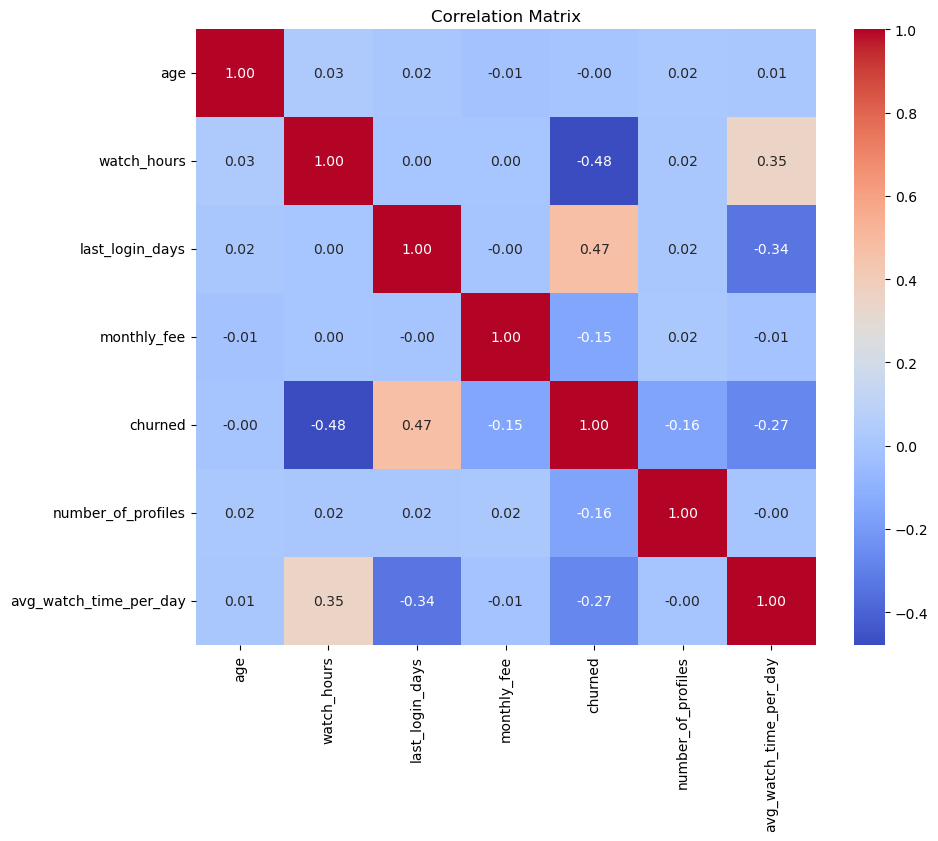

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()